In [ ]:
# dataset: https://www.kaggle.com/datasets/hasibalmuzdadid/messi-neymar-ronaldo-lewandowski-all-goals/data
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('lewandowski.csv')
df.head()


,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist
0,Betclic 1 Liga,1,7/29/07,Away,Znicz Pruszkow,Pelikan Lowicz,0:2,CF,90',0:2,Not reported,Not Applicable
1,Betclic 1 Liga,2,8/5/07,Home,Znicz Pruszkow,Kmita Zabierzów,4:0,CF,77',4:0,Not reported,Not Applicable
2,Betclic 1 Liga,3,8/8/07,Away,Znicz Pruszkow,GKS Katowice,1:2,Not Applicable,16',0:1,Not reported,Not Applicable
3,Betclic 1 Liga,4,8/11/07,Away,Znicz Pruszkow,LKS Lomza,2:4,Not Applicable,41',2:2,Penalty,Not Applicable
4,Betclic 1 Liga,11,9/19/07,Home,Znicz Pruszkow,GKS Jastrzebie,4:2,Not Applicable,7',1:0,Not reported,Not Applicable


In [4]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df['Date'].head()


0   2007-07-29
1   2007-08-05
2   2007-08-08
3   2007-08-11
4   2007-09-19
Name: Date, dtype: datetime64[ns]

In [5]:
# Split 'Result' into Goals_For and Goals_Against based on Venue
def parse_result(row):
    score = row['Result']
    venue = row['Venue']
    try:
        gf, ga = map(int, score.split(':'))
        return (gf, ga) if venue == 'Home' else (ga, gf)
    except:
        return (np.nan, np.nan)

df[['Goals_For', 'Goals_Against']] = df.apply(parse_result, axis=1, result_type='expand')
df[['Goals_For', 'Goals_Against']].head()

,Goals_For,Goals_Against
0,2,0
1,4,0
2,2,1
3,4,2
4,4,2


In [6]:
# Add Match Outcome column
def match_outcome(row):
    if pd.isna(row['Goals_For']) or pd.isna(row['Goals_Against']):
        return 'Unknown'
    if row['Goals_For'] > row['Goals_Against']:
        return 'Win'
    elif row['Goals_For'] < row['Goals_Against']:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(match_outcome, axis=1)
df['Outcome'].value_counts()


Outcome
Win     537
Draw     39
Loss     34
Name: count, dtype: int64

In [7]:
# Remove apostrophe and convert to integer
import re

def parse_minute(min_str):
    if pd.isna(min_str):
        return np.nan
    min_str = min_str.replace("'", "")
    # Handle formats like '45+1'
    if '+' in min_str:
        parts = re.split(r'\+', min_str)
        return int(parts[0]) + int(parts[1])
    try:
        return float(min_str)
    except:
        return np.nan

df['Minute'] = df['Minute'].apply(parse_minute)
df['Minute'].describe()



count    610.000000
mean      49.226230
std       25.948819
min        1.000000
25%       27.000000
50%       50.000000
75%       72.000000
max       99.000000
Name: Minute, dtype: float64

In [8]:
df.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,Goals_For,Goals_Against,Outcome
0,Betclic 1 Liga,1,2007-07-29,Away,Znicz Pruszkow,Pelikan Lowicz,0:2,CF,90.0,0:2,Not reported,Not Applicable,2,0,Win
1,Betclic 1 Liga,2,2007-08-05,Home,Znicz Pruszkow,Kmita Zabierzów,4:0,CF,77.0,4:0,Not reported,Not Applicable,4,0,Win
2,Betclic 1 Liga,3,2007-08-08,Away,Znicz Pruszkow,GKS Katowice,1:2,Not Applicable,16.0,0:1,Not reported,Not Applicable,2,1,Win
3,Betclic 1 Liga,4,2007-08-11,Away,Znicz Pruszkow,LKS Lomza,2:4,Not Applicable,41.0,2:2,Penalty,Not Applicable,4,2,Win
4,Betclic 1 Liga,11,2007-09-19,Home,Znicz Pruszkow,GKS Jastrzebie,4:2,Not Applicable,7.0,1:0,Not reported,Not Applicable,4,2,Win


In [9]:
# Convert Venue to categorical type
df['Venue'] = df['Venue'].astype('category')
df['Venue'].value_counts()


Venue
Home    329
Away    281
Name: count, dtype: int64

In [10]:
# Replace 'Not reported' and 'Not Applicable' with NaN
df.replace({'Not reported': np.nan, 'Not Applicable': np.nan}, inplace=True)
df[['Goal Type', 'Assist']].isna().sum()


Goal Type     30
Assist       149
dtype: int64

In [11]:
# Strip extra spaces and standardize names
df['Tournament'] = df['Tournament'].str.strip()
df['Club'] = df['Club'].str.strip()
df['Opponent'] = df['Opponent'].str.strip()
df[['Tournament', 'Club', 'Opponent']].head()


,Tournament,Club,Opponent
0,Betclic 1 Liga,Znicz Pruszkow,Pelikan Lowicz
1,Betclic 1 Liga,Znicz Pruszkow,Kmita Zabierzów
2,Betclic 1 Liga,Znicz Pruszkow,GKS Katowice
3,Betclic 1 Liga,Znicz Pruszkow,LKS Lomza
4,Betclic 1 Liga,Znicz Pruszkow,GKS Jastrzebie


In [12]:
# Split 'When Scored' into Before and After scores
def parse_score(score_str):
    try:
        return tuple(map(int, score_str.split(':')))
    except:
        return (np.nan, np.nan)

df[['Score_Club', 'Score_Opponent']] = df['When Scored'].apply(parse_score).apply(pd.Series)
df[['Score_Club', 'Score_Opponent']].head()


,Score_Club,Score_Opponent
0,0,2
1,4,0
2,0,1
3,2,2
4,1,0


In [13]:
# Extract season from date
df['Season'] = df['Date'].apply(lambda x: f"{x.year}/{x.year+1}" if x.month >= 7 else f"{x.year-1}/{x.year}")
df['Season'].value_counts().head()


Season
2020/2021    54
2021/2022    50
2019/2020    49
2016/2017    43
2024/2025    42
Name: count, dtype: int64

In [14]:
# Sort and compute cumulative goals
df = df.sort_values(by='Date')
df['Cumulative_Goals'] = df.groupby('Season').cumcount() + 1
df[['Date', 'Season', 'Cumulative_Goals']].head()


,Date,Season,Cumulative_Goals
0,2007-07-29,2007/2008,1
1,2007-08-05,2007/2008,2
2,2007-08-08,2007/2008,3
3,2007-08-11,2007/2008,4
4,2007-09-19,2007/2008,5


In [15]:
df.head(10)

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,Goals_For,Goals_Against,Outcome,Score_Club,Score_Opponent,Season,Cumulative_Goals
0,Betclic 1 Liga,1,2007-07-29,Away,Znicz Pruszkow,Pelikan Lowicz,0:2,CF,90.0,0:2,NaN,NaN,2,0,Win,0,2,2007/2008,1
1,Betclic 1 Liga,2,2007-08-05,Home,Znicz Pruszkow,Kmita Zabierzów,4:0,CF,77.0,4:0,NaN,NaN,4,0,Win,4,0,2007/2008,2
2,Betclic 1 Liga,3,2007-08-08,Away,Znicz Pruszkow,GKS Katowice,1:2,NaN,16.0,0:1,NaN,NaN,2,1,Win,0,1,2007/2008,3
3,Betclic 1 Liga,4,2007-08-11,Away,Znicz Pruszkow,LKS Lomza,2:4,NaN,41.0,2:2,Penalty,NaN,4,2,Win,2,2,2007/2008,4
4,Betclic 1 Liga,11,2007-09-19,Home,Znicz Pruszkow,GKS Jastrzebie,4:2,NaN,7.0,1:0,NaN,NaN,4,2,Win,1,0,2007/2008,5
5,Betclic 1 Liga,11,2007-09-19,Home,Znicz Pruszkow,GKS Jastrzebie,4:2,NaN,84.0,3:2,NaN,NaN,4,2,Win,3,2,2007/2008,6
6,Betclic 1 Liga,11,2007-09-19,Home,Znicz Pruszkow,GKS Jastrzebie,4:2,NaN,88.0,4:2,NaN,NaN,4,2,Win,4,2,2007/2008,7
8,Betclic 1 Liga,18,2007-11-04,Home,Znicz Pruszkow,Pelikan Lowicz,2:2,NaN,70.0,2:2,NaN,NaN,2,2,Draw,2,2,2007/2008,8
7,Betclic 1 Liga,18,2007-11-04,Home,Znicz Pruszkow,Pelikan Lowicz,2:2,NaN,19.0,1:0,NaN,NaN,2,2,Draw,1,0,2007/2008,9
9,Betclic 1 Liga,21,2008-03-16,Home,Znicz Pruszkow,LKS Lomza,3:1,NaN,62.0,1:0,NaN,NaN,3,1,Win,1,0,2007/2008,10


In [ ]:
# Save to Excel, overwriting the original file
df.to_excel('lewandowski_cleaned.xlsx', index=False)

In [24]:
# Load the cleaned Excel file
df_cleaned = pd.read_excel('lewandowski_cleaned.xlsx')

# Display the first few rows
print(df_cleaned.head())


       Tournament Matchday       Date Venue            Club         Opponent  \
0  Betclic 1 Liga        1 2007-07-29  Away  Znicz Pruszkow   Pelikan Lowicz   
1  Betclic 1 Liga        2 2007-08-05  Home  Znicz Pruszkow  Kmita Zabierzów   
2  Betclic 1 Liga        3 2007-08-08  Away  Znicz Pruszkow     GKS Katowice   
3  Betclic 1 Liga        4 2007-08-11  Away  Znicz Pruszkow        LKS Lomza   
4  Betclic 1 Liga       11 2007-09-19  Home  Znicz Pruszkow   GKS Jastrzebie   

  Result Position  Minute When Scored Goal Type Assist  Goals_For  \
0    0:2       CF      90         0:2       NaN    NaN          2   
1    4:0       CF      77         4:0       NaN    NaN          4   
2    1:2      NaN      16         0:1       NaN    NaN          2   
3    2:4      NaN      41         2:2   Penalty    NaN          4   
4    4:2      NaN       7         1:0       NaN    NaN          4   

   Goals_Against Outcome  Score_Club  Score_Opponent     Season  \
0              0     Win           0 

In [25]:
# Just read and use the data as-is
df_cleaned['Goal Type'].value_counts(dropna=False)


Goal Type
Right-footed shot         279
Left-footed shot          100
Header                     94
Penalty                    72
NaN                        30
Tap-in                     13
Counter attack goal         8
Direct free kick            7
Deflected shot on goal      5
Long distance kick          1
Chest                       1
Name: count, dtype: int64

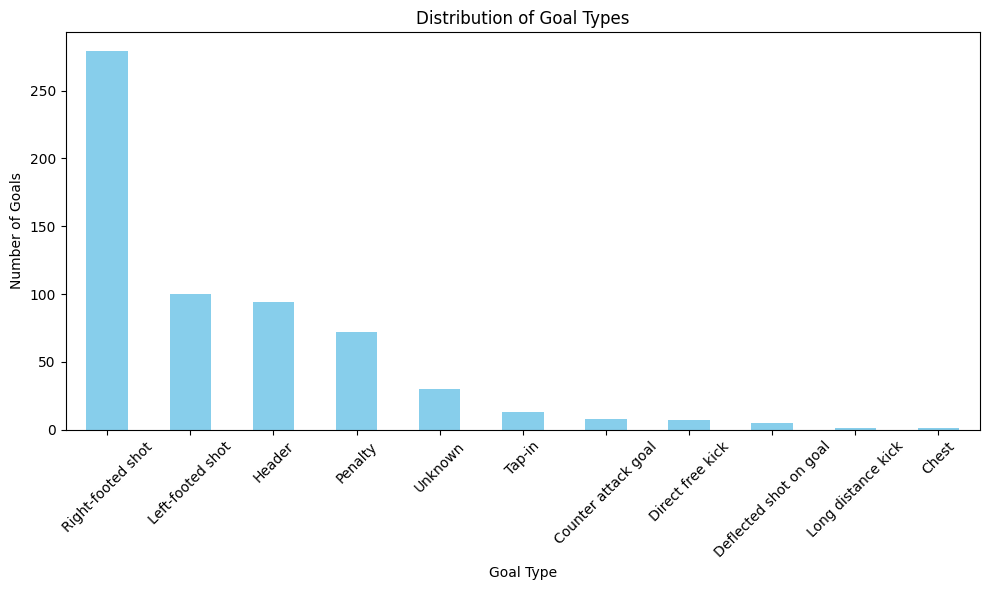

In [27]:
#Visualizing Goal Distribution Type

import matplotlib.pyplot as plt

df_cleaned['Goal Type'].fillna('Unknown', inplace=True)
goal_counts = df_cleaned['Goal Type'].value_counts()

plt.figure(figsize=(10,6))
goal_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Goal Types')
plt.xlabel('Goal Type')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


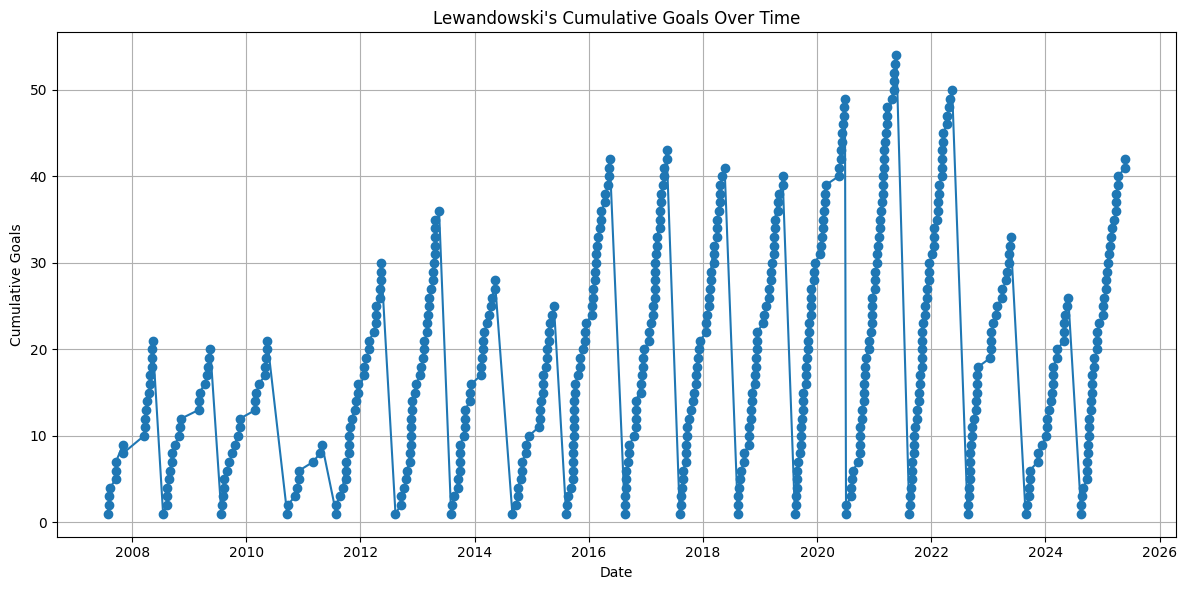

In [37]:
#Chart Type: Line Chart
# Insight: Track Lewandowski’s cumulative goals across seasons.

df = pd.read_excel("lewandowski_cleaned.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Cumulative_Goals'], marker='o', linestyle='-')
plt.title("Lewandowski's Cumulative Goals Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Goals")
plt.grid(True)
plt.tight_layout()
plt.show()


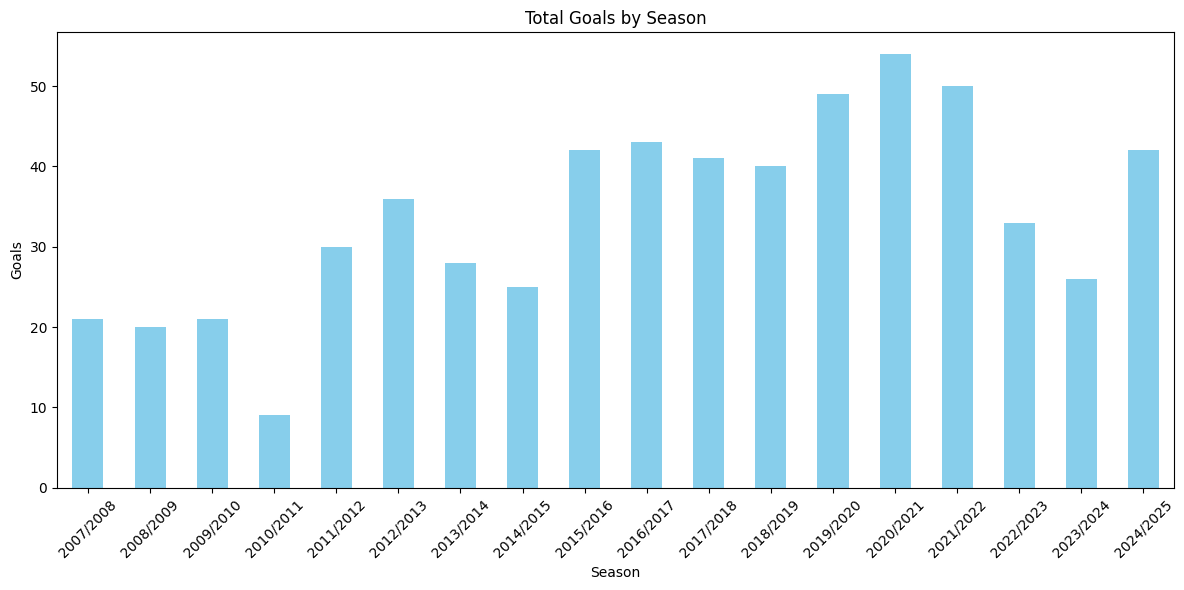

In [ ]:
#Goals by season
# Chart Type: Bar Chart
# Insight: Compare total goals scored in each season.
season_goals = df.groupby('Season')['Cumulative_Goals'].max()

season_goals.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Total Goals by Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


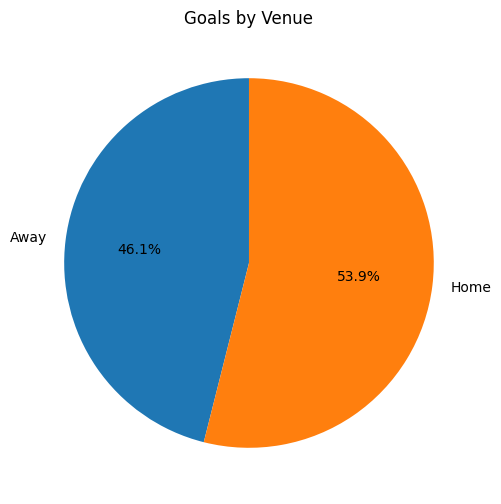

In [31]:
#Goals by Venue
#Chart Type: Pie Chart
# Insight: Distribution of goals scored at home vs away.
venue_goals = df.groupby('Venue').size()

venue_goals.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Goals by Venue")
plt.ylabel("")
plt.show()


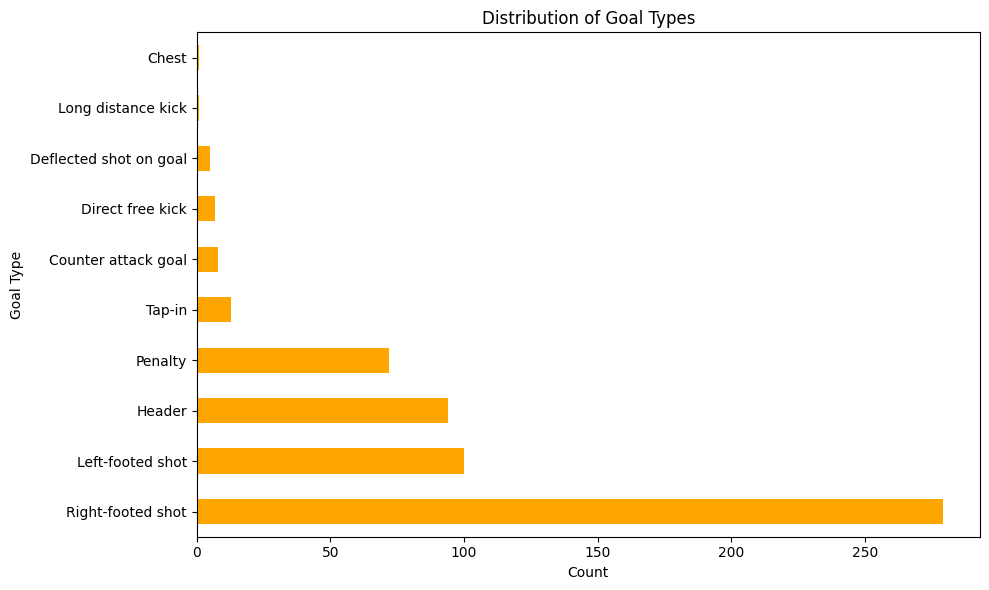

In [ ]:
#Goal types distribution
# Chart Type: Horizontal Bar Chart 
#Insight: Most frequent types of goals (e.g., header, penalty, left-footed).

goal_types = df['Goal Type'].value_counts()

goal_types.plot(kind='barh', color='orange', figsize=(10,6))
plt.title("Distribution of Goal Types")
plt.xlabel("Count")
plt.ylabel("Goal Type")
plt.tight_layout()
plt.show()
